In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
# target = "mldec_results.xlsx"
target = "ffnn-v0.2/ffnn_toy_problem_only_good_examples_results.csv"
df_ffnn = pd.read_csv(target)


ffnn before:
```
hyperparameters:
  lr: [0.0001, 0.0005, 0.001, 0.002, 0.006, 0.01, 0.022, 0.04, 0.06]
  hidden_dim: [8, 16, 32, 64]
  dropout: [0.05, 0.1, 0.15]
  n_layers: [2, 3, 4, 5, 6]
  batch_size: [250]
```

ffnn after:
```
hyperparameters:
  lr: [0.0003, 0.0005, 0.001, 0.002, 0.006,]
  hidden_dim: [32, 64]
  dropout: [0.05, 0.1, 0.15]
  n_layers: [2, 3, 4]
  batch_size: [250]
```

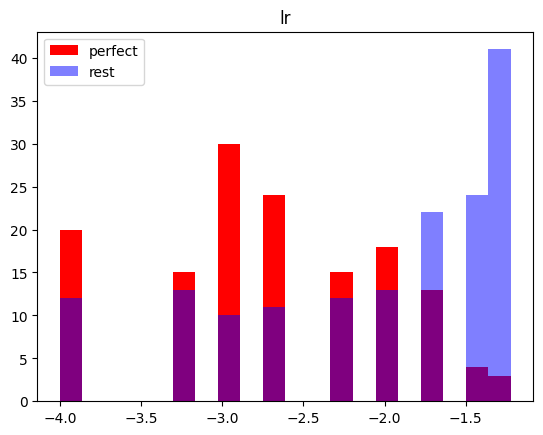

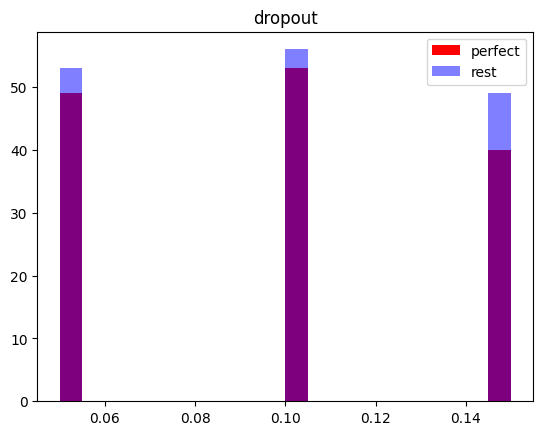

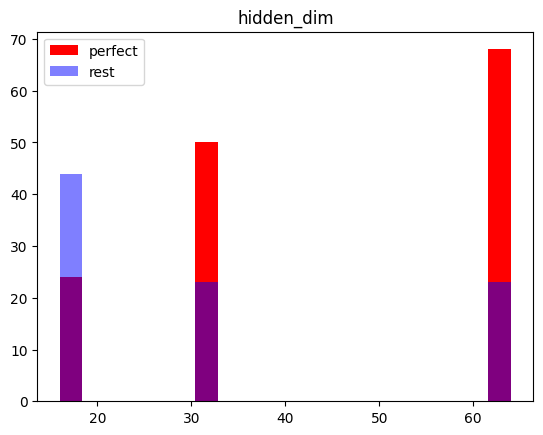

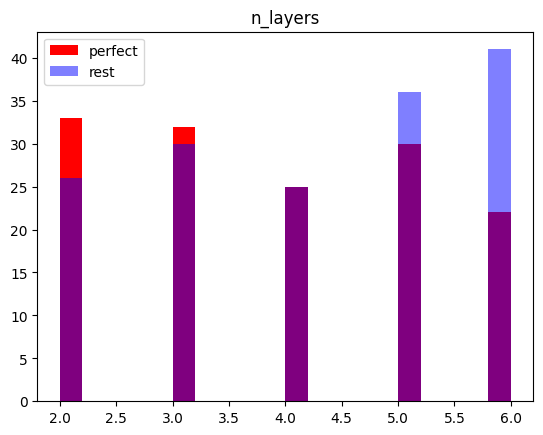

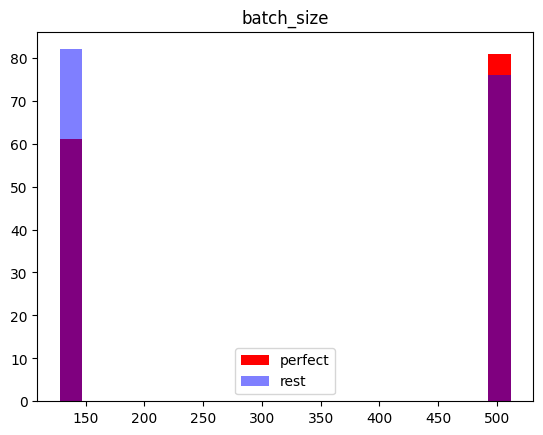

In [27]:
def compare_slice_by_column(df, column, slice_by):
    best = df[df[slice_by] == 1]
    other = df[df[slice_by] != 1]
    best = best[column]
    other = other[column]
    if column == 'lr':
        best = np.log10(best)
        other = np.log10(other)
    cts, bins, _ = plt.hist(best, bins=20, alpha=1, color='r', label='perfect')
    plt.hist(other, bins=bins, alpha=0.5, color='b', label='rest')
    plt.legend()
    plt.title(column)
    plt.show()

ffnn_columns = ['lr', 'dropout', 'hidden_dim', 'n_layers', 'batch_size']
for column in ffnn_columns:
    compare_slice_by_column(df_ffnn, column, 'val_acc')

In [ ]:
df = pd.read_excel("mldec_results.xlsx", sheet_name=None)
df_cnn = df['cnn_toy_problem_only_good_examp']
df_xformer = df['xformer_only_good_examples']
cnn_columns = ['lr', 'dropout', 'kernel_size', 'conv_channels', 'n_layers', 'batch_size']
xformer_columns = ['lr', 'dropout', 'd_model', 'num_encoder_layers', 'num_decoder_layers', 'nhead', 'dim_feedforward', 'batch_size']

In [ ]:
for column in cnn_columns:
    compare_slice_by_column(df_cnn, column, 'val_acc')

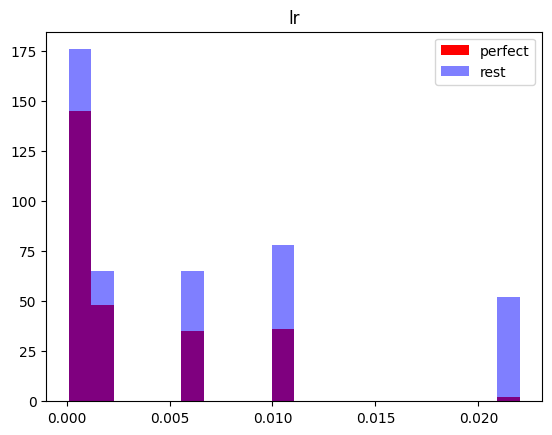

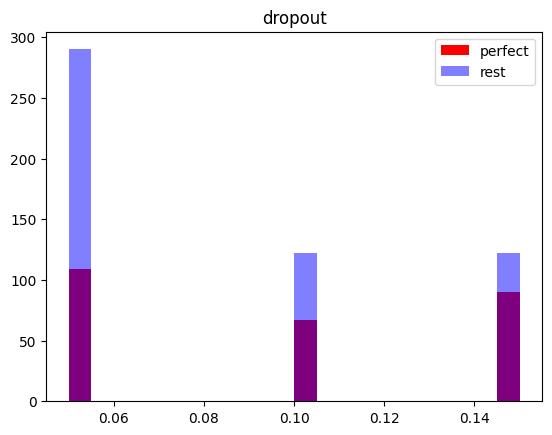

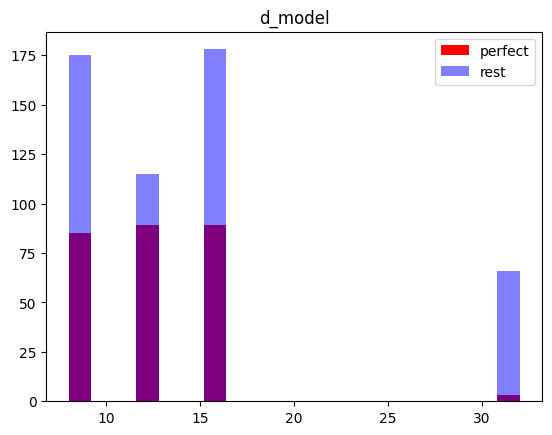

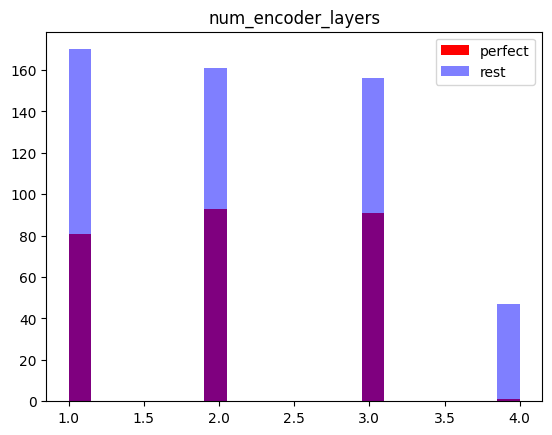

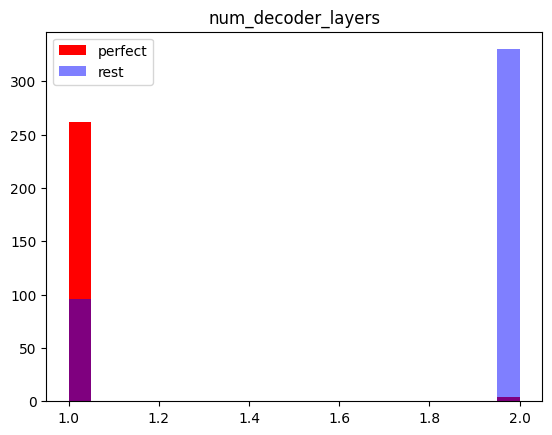

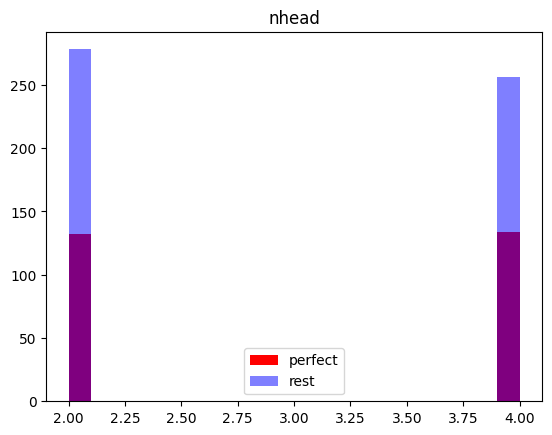

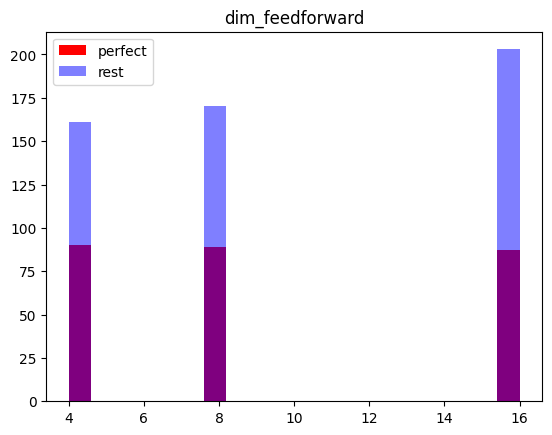

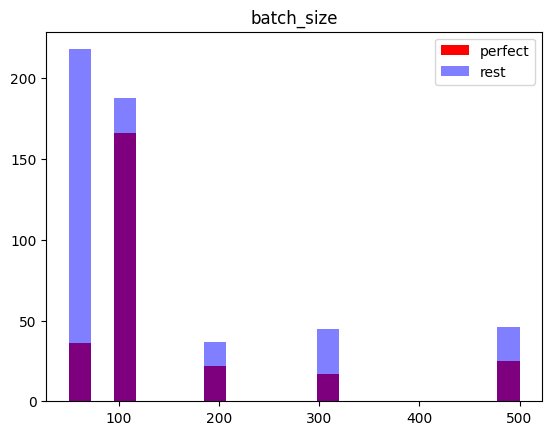

In [15]:
for column in xformer_columns:
    compare_slice_by_column(df_xformer, column, 'val_acc')